# **IMPORTING CSV FILE FROM GOOGLE DRIVE**

In [ ]:
from google.colab import drive
path="/content/drive/My Drive/WA_Fn-UseC_-HR-Employee-Attrition.csv"

## Reading Data from the File

In [ ]:
import pandas as pd
df=pd.read_csv(path)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


# Dropping unnecesary data

In [ ]:
df=df.drop(['Attrition','BusinessTravel','DailyRate','DistanceFromHome','EmployeeCount','HourlyRate','MonthlyRate','Over18','OverTime','PercentSalaryHike','StandardHours',	'StockOptionLevel',	'TotalWorkingYears',	'TrainingTimesLastYear',	'WorkLifeBalance','YearsInCurrentRole','EnvironmentSatisfaction',	'JobInvolvement','YearsSinceLastPromotion',	'YearsWithCurrManager'], axis=1)

In [ ]:
df

,Age,Department,Education,EducationField,EmployeeNumber,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,YearsAtCompany
0,41,Sales,2,Life Sciences,1,Female,2,Sales Executive,4,Single,5993,8,3,1,6
1,49,Research & Development,1,Life Sciences,2,Male,2,Research Scientist,2,Married,5130,1,4,4,10
2,37,Research & Development,2,Other,4,Male,1,Laboratory Technician,3,Single,2090,6,3,2,0
3,33,Research & Development,4,Life Sciences,5,Female,1,Research Scientist,3,Married,2909,1,3,3,8
4,27,Research & Development,1,Medical,7,Male,1,Laboratory Technician,2,Married,3468,9,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,2,Medical,2061,Male,2,Laboratory Technician,4,Married,2571,4,3,3,5
1466,39,Research & Development,1,Medical,2062,Male,3,Healthcare Representative,1,Married,9991,4,3,1,7
1467,27,Research & Development,3,Life Sciences,2064,Male,2,Manufacturing Director,2,Married,6142,1,4,2,6
1468,49,Sales,3,Medical,2065,Male,2,Sales Executive,2,Married,5390,2,3,4,9


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
df.head(10)

,Age,Department,Education,EducationField,EmployeeNumber,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,YearsAtCompany
0,41,Sales,2,Life Sciences,1,Female,2,Sales Executive,4,Single,5993,8,3,1,6
1,49,Research & Development,1,Life Sciences,2,Male,2,Research Scientist,2,Married,5130,1,4,4,10
2,37,Research & Development,2,Other,4,Male,1,Laboratory Technician,3,Single,2090,6,3,2,0
3,33,Research & Development,4,Life Sciences,5,Female,1,Research Scientist,3,Married,2909,1,3,3,8
4,27,Research & Development,1,Medical,7,Male,1,Laboratory Technician,2,Married,3468,9,3,4,2
5,32,Research & Development,2,Life Sciences,8,Male,1,Laboratory Technician,4,Single,3068,0,3,3,7
6,59,Research & Development,3,Medical,10,Female,1,Laboratory Technician,1,Married,2670,4,4,1,1
7,30,Research & Development,1,Life Sciences,11,Male,1,Laboratory Technician,3,Divorced,2693,1,4,2,1
8,38,Research & Development,3,Life Sciences,12,Male,3,Manufacturing Director,3,Single,9526,0,4,2,9
9,36,Research & Development,3,Medical,13,Male,2,Healthcare Representative,3,Married,5237,6,3,2,7


In [ ]:
print('# of employees in the data: '+str(len(df.index)))

# of employees in the data: 1470


# **Analyzing Data**

# Department wise Employees

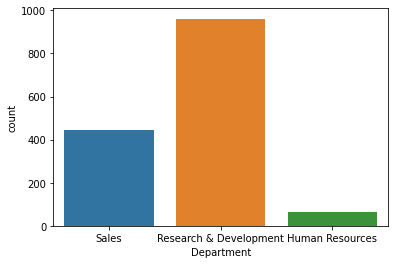

In [ ]:
sns.countplot(x="Department", data=df)

## Employees classified on the basis of their Education Field

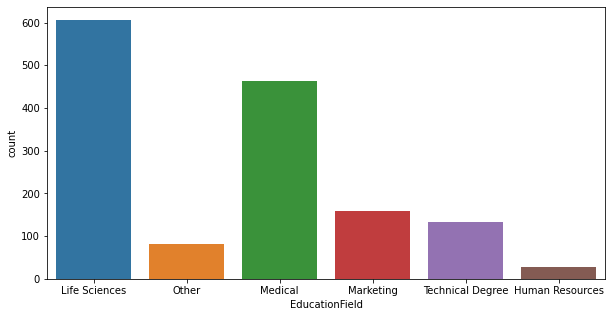

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="EducationField", data=df)

## Classification on the basis of Job Roles

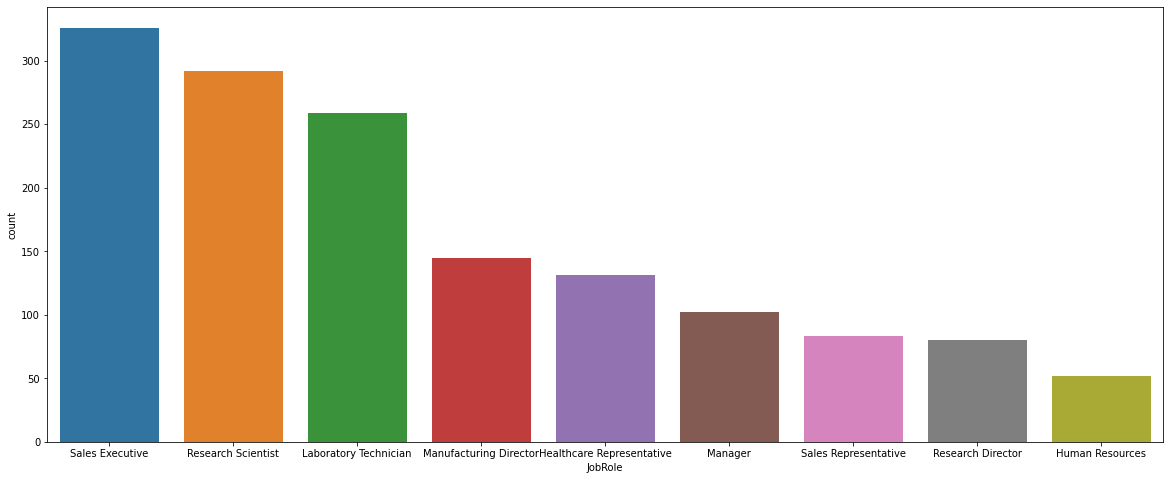

In [ ]:
plt.figure(figsize=(20, 8))
sns.countplot(x="JobRole", data=df)

## Division on the basis of Gender in all Departments 

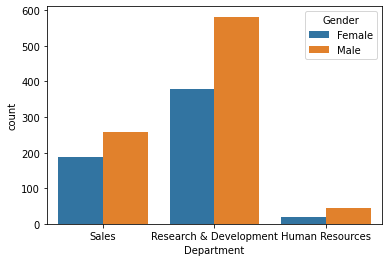

In [ ]:
sns.countplot(x="Department", hue="Gender", data=df)

## Division on the basis of Gender in Educational Fields

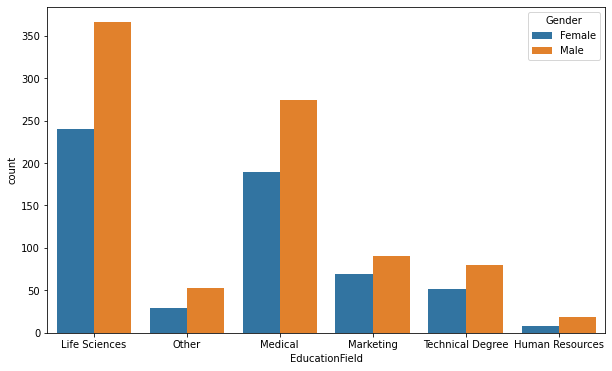

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="EducationField", hue="Gender",data=df)

## Division on the basis of Job Level in Job Roles

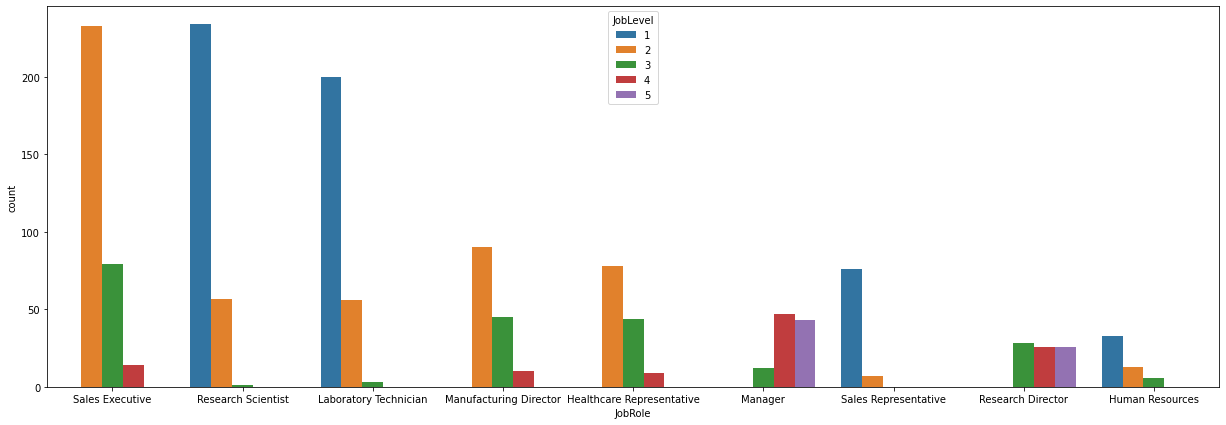

In [ ]:
plt.figure(figsize=(21, 7))
sns.countplot(x="JobRole", hue="JobLevel",data=df)

# Age Distribution

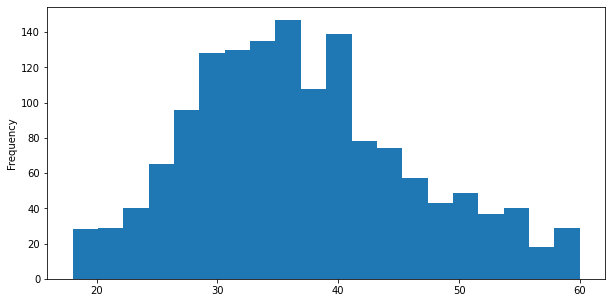

In [ ]:
df["Age"].plot.hist(bins=20, figsize=(10,5))

# Salary Distribution

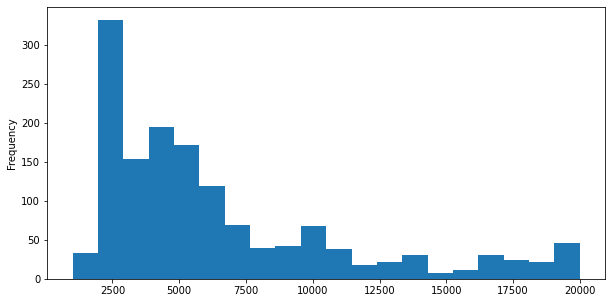

In [ ]:
df["MonthlyIncome"].plot.hist(bins=20, figsize=(10,5))

## **DATA WRANGLING: Checking for NaN or Null Values** 

In [ ]:
df.isnull()

,Age,Department,Education,EducationField,EmployeeNumber,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,YearsAtCompany
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Age                         0
Department                  0
Education                   0
EducationField              0
EmployeeNumber              0
Gender                      0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
PerformanceRating           0
RelationshipSatisfaction    0
YearsAtCompany              0
dtype: int64

## Checking for NULL or NaN values graphically

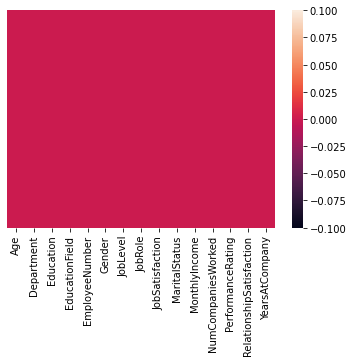

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False)

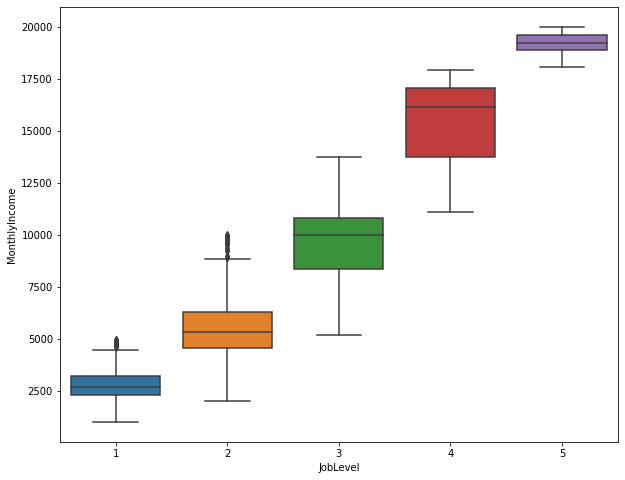

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="JobLevel", y="MonthlyIncome", data=df)

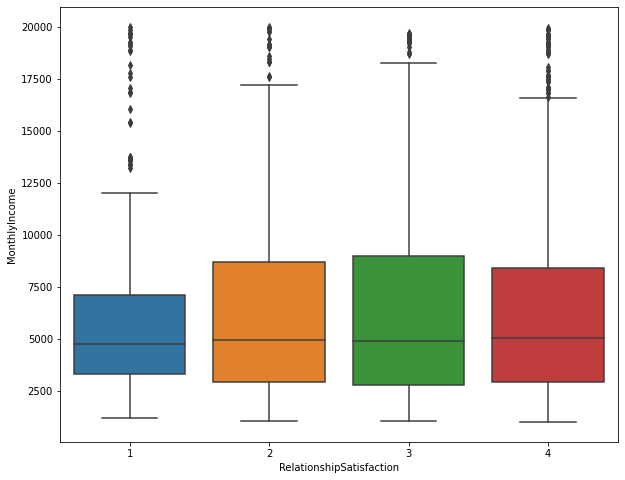

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="RelationshipSatisfaction", y="MonthlyIncome", data=df)

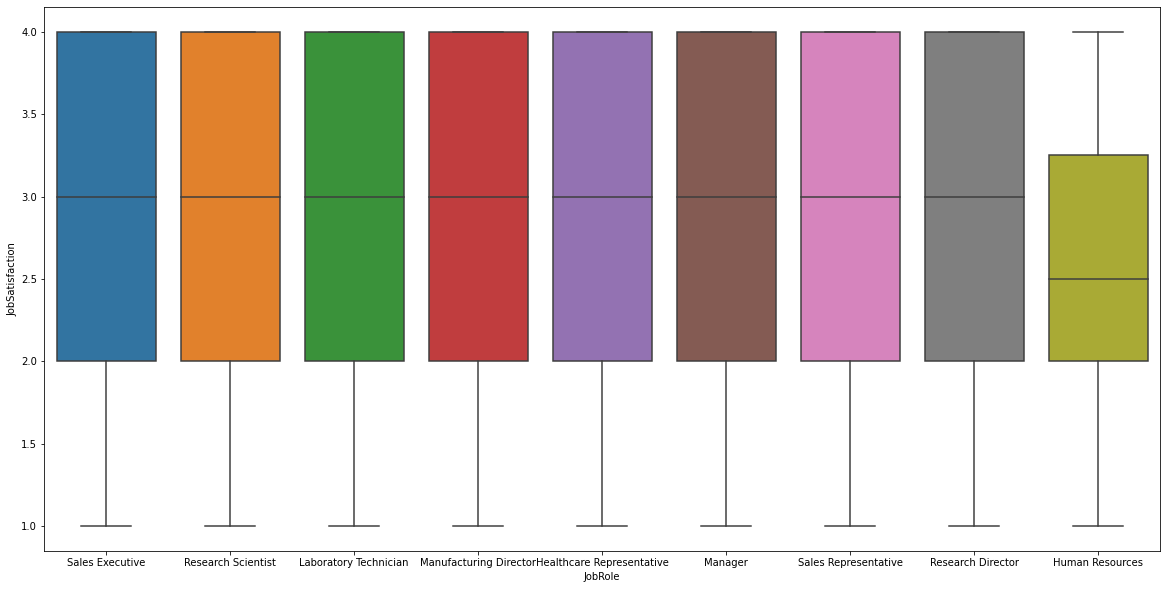

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="JobRole", y="JobSatisfaction", data=df)

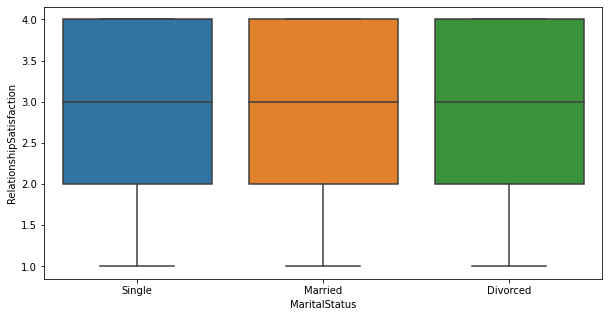

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="MaritalStatus", y="RelationshipSatisfaction", data=df)

# Coverting String values to Numeric values

In [ ]:
pd.get_dummies(df['Gender'])

,Female,Male
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
1465,0,1
1466,0,1
1467,0,1
1468,0,1


In [ ]:
Sex=pd.get_dummies(df['Gender'], drop_first=True)
print(Sex)

      Male
0        0
1        1
2        1
3        0
4        1
...    ...
1465     1
1466     1
1467     1
1468     1
1469     1

[1470 rows x 1 columns]


In [ ]:
pd.get_dummies(df['MaritalStatus'])

,Divorced,Married,Single
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
1465,0,1,0
1466,0,1,0
1467,0,1,0
1468,0,1,0


In [ ]:
Status=pd.get_dummies(df['MaritalStatus'], drop_first=True)
print(Status)

      Married  Single
0           0       1
1           1       0
2           0       1
3           1       0
4           1       0
...       ...     ...
1465        1       0
1466        1       0
1467        1       0
1468        1       0
1469        1       0

[1470 rows x 2 columns]


In [ ]:
df['PerformanceRating'] = df['PerformanceRating'].astype(str)

In [ ]:
df['PerformanceRating'] = df['PerformanceRating'].replace(['3'],'Satisfactory')
df['PerformanceRating'] = df['PerformanceRating'].replace(['4'],'Good')

In [ ]:
df

,Age,Department,Education,EducationField,EmployeeNumber,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,YearsAtCompany
0,41,Sales,2,Life Sciences,1,Female,2,Sales Executive,4,Single,5993,8,Satisfactory,1,6
1,49,Research & Development,1,Life Sciences,2,Male,2,Research Scientist,2,Married,5130,1,Good,4,10
2,37,Research & Development,2,Other,4,Male,1,Laboratory Technician,3,Single,2090,6,Satisfactory,2,0
3,33,Research & Development,4,Life Sciences,5,Female,1,Research Scientist,3,Married,2909,1,Satisfactory,3,8
4,27,Research & Development,1,Medical,7,Male,1,Laboratory Technician,2,Married,3468,9,Satisfactory,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,2,Medical,2061,Male,2,Laboratory Technician,4,Married,2571,4,Satisfactory,3,5
1466,39,Research & Development,1,Medical,2062,Male,3,Healthcare Representative,1,Married,9991,4,Satisfactory,1,7
1467,27,Research & Development,3,Life Sciences,2064,Male,2,Manufacturing Director,2,Married,6142,1,Good,2,6
1468,49,Sales,3,Medical,2065,Male,2,Sales Executive,2,Married,5390,2,Satisfactory,4,9


In [ ]:
pd.get_dummies(df['PerformanceRating'])

,Good,Satisfactory
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
1465,0,1
1466,0,1
1467,1,0
1468,0,1


In [ ]:
Performance=pd.get_dummies(df['PerformanceRating'], drop_first=True)
print(Performance)

      Satisfactory
0                1
1                0
2                1
3                1
4                1
...            ...
1465             1
1466             1
1467             0
1468             1
1469             1

[1470 rows x 1 columns]


In [ ]:
pd.get_dummies(df['Department'])

,Human Resources,Research & Development,Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1465,0,1,0
1466,0,1,0
1467,0,1,0
1468,0,0,1


In [ ]:
Dept=pd.get_dummies(df['Department'], drop_first=True)
print(Dept)

      Research & Development  Sales
0                          0      1
1                          1      0
2                          1      0
3                          1      0
4                          1      0
...                      ...    ...
1465                       1      0
1466                       1      0
1467                       1      0
1468                       0      1
1469                       1      0

[1470 rows x 2 columns]


In [ ]:
df=pd.concat([df,Dept,Sex,Status,Performance],axis=1)

In [ ]:
df

,Age,Department,Education,EducationField,EmployeeNumber,Gender,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,YearsAtCompany,Research & Development,Sales,Male,Married,Single,Satisfactory
0,41,Sales,2,Life Sciences,1,Female,2,Sales Executive,4,Single,5993,8,Satisfactory,1,6,0,1,0,0,1,1
1,49,Research & Development,1,Life Sciences,2,Male,2,Research Scientist,2,Married,5130,1,Good,4,10,1,0,1,1,0,0
2,37,Research & Development,2,Other,4,Male,1,Laboratory Technician,3,Single,2090,6,Satisfactory,2,0,1,0,1,0,1,1
3,33,Research & Development,4,Life Sciences,5,Female,1,Research Scientist,3,Married,2909,1,Satisfactory,3,8,1,0,0,1,0,1
4,27,Research & Development,1,Medical,7,Male,1,Laboratory Technician,2,Married,3468,9,Satisfactory,4,2,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,2,Medical,2061,Male,2,Laboratory Technician,4,Married,2571,4,Satisfactory,3,5,1,0,1,1,0,1
1466,39,Research & Development,1,Medical,2062,Male,3,Healthcare Representative,1,Married,9991,4,Satisfactory,1,7,1,0,1,1,0,1
1467,27,Research & Development,3,Life Sciences,2064,Male,2,Manufacturing Director,2,Married,6142,1,Good,2,6,1,0,1,1,0,0
1468,49,Sales,3,Medical,2065,Male,2,Sales Executive,2,Married,5390,2,Satisfactory,4,9,0,1,1,1,0,1


In [ ]:
df.drop(['Department','Education','EducationField','EmployeeNumber','Gender','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked','PerformanceRating','RelationshipSatisfaction','YearsAtCompany'],axis=1,inplace=True)

In [ ]:
df

,Age,MonthlyIncome,Research & Development,Sales,Male,Married,Single,Satisfactory
0,41,5993,0,1,0,0,1,1
1,49,5130,1,0,1,1,0,0
2,37,2090,1,0,1,0,1,1
3,33,2909,1,0,0,1,0,1
4,27,3468,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...
1465,36,2571,1,0,1,1,0,1
1466,39,9991,1,0,1,1,0,1
1467,27,6142,1,0,1,1,0,0
1468,49,5390,0,1,1,1,0,1


## **TRAIN DATA**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop("Satisfactory",axis=1)
Y=df['Satisfactory']

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(Y_test,predictions)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        70\n           1       0.84      1.00      0.91       371\n\n    accuracy                           0.84       441\n   macro avg       0.42      0.50      0.46       441\nweighted avg       0.71      0.84      0.77       441\n'

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_test,predictions)

array([[  0,  70],
       [  0, 371]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)*100

84.12698412698413